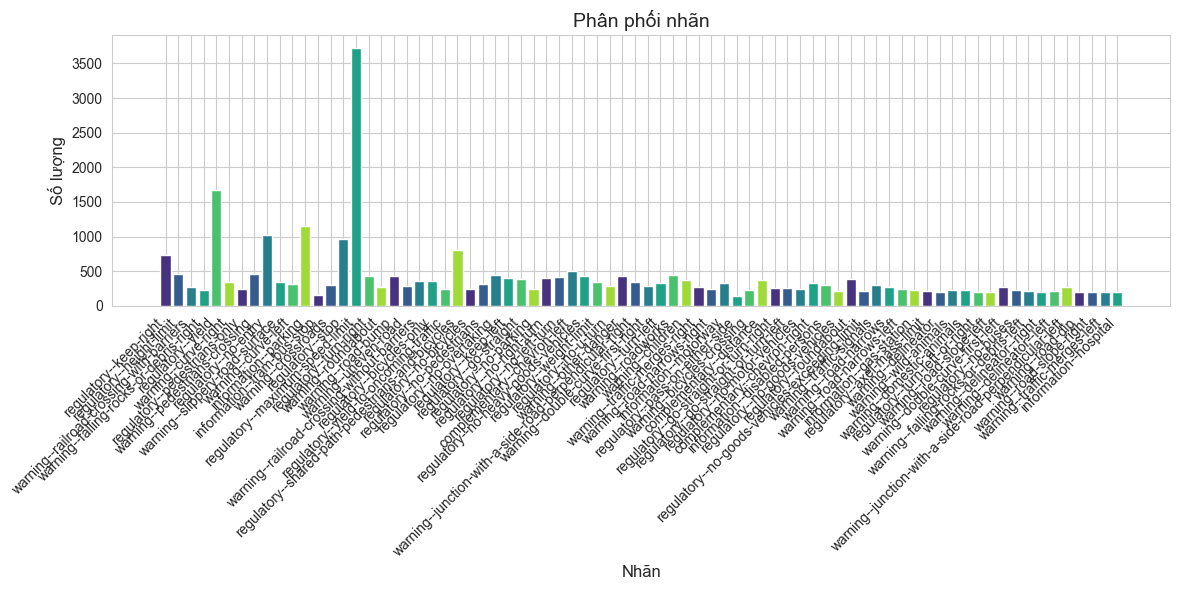

regulatory--keep-right: 727
regulatory--height-limit: 462
warning--railroad-crossing-with-barriers: 273
warning--falling-rocks-or-debris-right: 235
regulatory--yield: 1675
warning--curve-right: 339
regulatory--pedestrians-only: 239
warning--pedestrians-crossing: 465
regulatory--no-entry: 1023
warning--slippery-road-surface: 351
warning--curve-left: 316
information--parking: 1156
information--tram-bus-stop: 156
warning--crossroads: 308
regulatory--stop: 967
regulatory--maximum-speed-limit: 3719
regulatory--turn-right: 437
warning--roundabout: 277
warning--road-bump: 433
warning--uneven-road: 283
warning--railroad-crossing-without-barriers: 360
regulatory--bicycles-only: 356
regulatory--yield-to-oncoming-traffic: 242
regulatory--shared-path-pedestrians-and-bicycles: 811
regulatory--no-bicycles: 244
regulatory--no-pedestrians: 312
regulatory--no-overtaking: 439
regulatory--keep-left: 397
regulatory--go-straight: 385
regulatory--no-parking: 242
regulatory--no-right-turn: 405
regulatory--no

In [1]:
import os
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_label_balance(xml_folder):
    label_counts = Counter()
    for filename in os.listdir(xml_folder):
        if filename.endswith(".xml"):
            filepath = os.path.join(xml_folder, filename)
            try:
                tree = ET.parse(filepath)
                root = tree.getroot()
                for obj in root.findall('object'):
                    name = obj.find('name').text
                    label_counts[name] += 1
            except Exception as e:
                print(f"Lỗi khi xử lý file {filename}: {e}")
    return label_counts

def plot_label_distribution(label_counts):
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color=sns.color_palette("viridis"))
    plt.xlabel("Nhãn", fontsize=12)
    plt.ylabel("Số lượng", fontsize=12)
    plt.title("Phân phối nhãn", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

def print_label_distribution(label_counts):
    for label, count in label_counts.items():
        print(f"{label}: {count}")

xml_folder = r"C:\Users\Admin\Downloads\archive\xmls"

label_counts = analyze_label_balance(xml_folder)

if label_counts:
    plot_label_distribution(label_counts)
    print_label_distribution(label_counts)
    print("\nĐánh giá tính cân bằng:")
    max_count = max(label_counts.values())
    min_count = min(label_counts.values())
    ratio = max_count / min_count
    print(f"Tỷ lệ giữa nhãn có số lượng lớn nhất và nhỏ nhất: {ratio:.2f}")
    if ratio > 5:
        print("Dữ liệu có vẻ mất cân bằng.")
    else:
        print("Dữ liệu có vẻ cân bằng.")
else:
    print("Không tìm thấy nhãn nào trong folder XML.")


🔎 Đang quét 'D:\archive\xmls' để tìm lớp 'regulatory--maximum-speed-limit'...
✅ Tìm thấy tổng cộng 3240 ảnh có chứa lớp 'regulatory--maximum-speed-limit'.

🎲 Đã chọn ngẫu nhiên 4 ảnh để hiển thị.


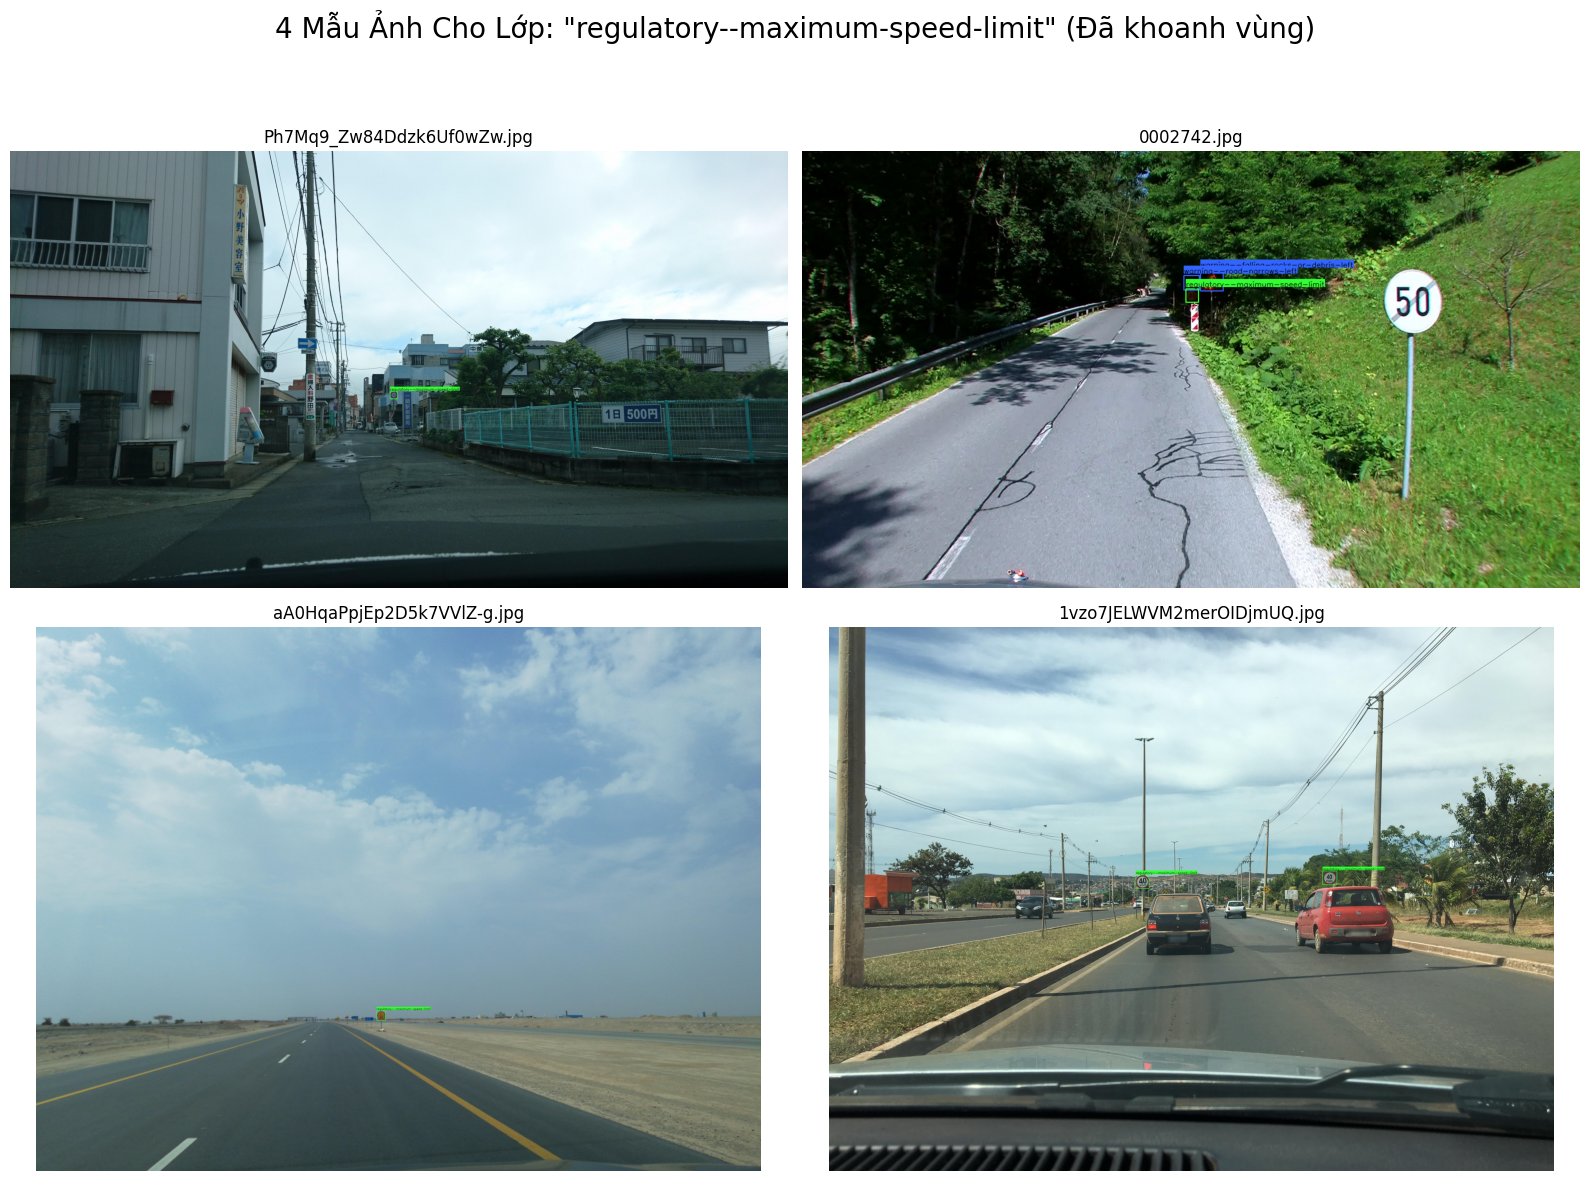

In [7]:
import os
import cv2
import random
import xml.etree.ElementTree as ET
from pathlib import Path
import matplotlib.pyplot as plt
import math # Thêm thư viện math

# =============================== CẤU HÌNH ===================================
# 1. Đường dẫn đến thư mục chứa ảnh gốc
IMAGE_DIR = r"D:\archive\images" 
# 2. Đường dẫn đến thư mục chứa file XML chú thích
XML_DIR = r"D:\archive\xmls" 

# 3. LỚP BẠN MUỐN TÌM (thay đổi giá trị này)
TARGET_CLASS = "regulatory--maximum-speed-limit" 

# 4. Số lượng ảnh mẫu muốn hiển thị (ví dụ 4 để có lưới 2x2)
NUM_SAMPLES = 4

# 5. CẤU HÌNH MÀU SẮC CHO BOUNDING BOX
HIGHLIGHT_COLOR = (50, 255, 50)  # Xanh lá cây sáng
OTHER_COLOR = (255, 100, 50)   # Xanh dương
# ============================================================================


def parse_xml_for_boxes(xml_path):
    """Đọc file XML và trích xuất thông tin các đối tượng (nhãn và bounding box)."""
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        objects = []
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            xmin = int(float(bndbox.find('xmin').text))
            ymin = int(float(bndbox.find('ymin').text))
            xmax = int(float(bndbox.find('xmax').text))
            ymax = int(float(bndbox.find('ymax').text))
            objects.append({'name': name, 'bbox': [xmin, ymin, xmax, ymax]})
        return objects
    except (ET.ParseError, FileNotFoundError):
        return []

def find_images_with_class(xml_directory, target_class):
    """Quét thư mục XML để tìm tất cả các file chứa một lớp cụ thể."""
    images_found = []
    print(f"🔎 Đang quét '{xml_directory}' để tìm lớp '{target_class}'...")
    for xml_path in Path(xml_directory).glob("*.xml"):
        objects = parse_xml_for_boxes(xml_path)
        for obj in objects:
            if obj['name'] == target_class:
                images_found.append(xml_path.stem)
                break
    print(f"✅ Tìm thấy tổng cộng {len(images_found)} ảnh có chứa lớp '{target_class}'.")
    return images_found

def draw_boxes_on_image(image, objects, target_class):
    """Vẽ các bounding box và nhãn lên ảnh."""
    for obj in objects:
        label = obj['name']
        xmin, ymin, xmax, ymax = obj['bbox']
        color = HIGHLIGHT_COLOR if label == target_class else OTHER_COLOR
        
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
        
        (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
        cv2.rectangle(image, (xmin, ymin - text_height - 10), (xmin + text_width, ymin - 5), color, -1)
        cv2.putText(image, label, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        
    return image

def display_images_with_boxes():
    """Hàm chính để tìm, chọn, vẽ và hiển thị các ảnh mẫu theo dạng lưới."""
    images_with_target_class = find_images_with_class(XML_DIR, TARGET_CLASS)

    if not images_with_target_class:
        print(f"\nKhông tìm thấy ảnh nào cho lớp '{TARGET_CLASS}'.")
        return

    num_to_select = min(len(images_with_target_class), NUM_SAMPLES)
    if num_to_select < NUM_SAMPLES:
        print(f"\n⚠️ Cảnh báo: Chỉ tìm thấy {num_to_select} ảnh, sẽ hiển thị tất cả.")
    
    selected_stems = random.sample(images_with_target_class, num_to_select)
    print(f"\n🎲 Đã chọn ngẫu nhiên {num_to_select} ảnh để hiển thị.")

    # --- THAY ĐỔI CHÍNH BẮT ĐẦU TỪ ĐÂY ---

    if num_to_select == 0:
        return

    # 1. Tính toán kích thước lưới (grid) để hiển thị ảnh
    # Ví dụ: 4 ảnh -> 2x2, 5 ảnh -> 2x3, 9 ảnh -> 3x3
    cols = math.ceil(math.sqrt(num_to_select))
    rows = math.ceil(num_to_select / cols)

    # 2. Tạo subplot với kích thước lưới đã tính
    # Kích thước ảnh lớn hơn để dễ nhìn: 8 inch rộng, 6 inch cao cho mỗi ô
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 6))
    fig.suptitle(f'{num_to_select} Mẫu Ảnh Cho Lớp: "{TARGET_CLASS}" (Đã khoanh vùng)', fontsize=20)

    # 3. "Làm phẳng" (flatten) mảng axes để dễ dàng lặp qua
    # Cho dù `axes` là 1D hay 2D, nó sẽ trở thành mảng 1D
    axes_flat = axes.flatten()

    # 4. Lặp qua các ảnh và vẽ lên từng ô (ax)
    for i, stem in enumerate(selected_stems):
        ax = axes_flat[i] # Lấy ô tương ứng
        
        image_path = next(Path(IMAGE_DIR).glob(f"{stem}.*"), None)
        xml_path = Path(XML_DIR) / f"{stem}.xml"
        
        if image_path and xml_path.exists():
            image = cv2.imread(str(image_path))
            objects = parse_xml_for_boxes(xml_path)
            image_with_boxes = draw_boxes_on_image(image.copy(), objects, TARGET_CLASS)
            image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)
            
            ax.imshow(image_rgb)
            ax.set_title(image_path.name, fontsize=12)
        else:
            ax.set_title(f"Không tìm thấy\n{stem}.*", color='red')
        
        ax.axis('off') # Ẩn trục tọa độ

    # 5. Ẩn các ô (axes) không sử dụng
    # Nếu có 5 ảnh trên lưới 2x3, ô cuối cùng sẽ bị ẩn đi
    for i in range(num_to_select, len(axes_flat)):
        axes_flat[i].axis('off')

    # --- KẾT THÚC THAY ĐỔI ---

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Điều chỉnh layout để không bị chồng chéo
    plt.show()

# --- Chạy hàm chính ---
if __name__ == "__main__":
    display_images_with_boxes()